In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import files
#uploaded = files.upload()

DNot ='posNewTouchedData/-1,-1.csv'
D0_0 = 'posNewTouchedData/0,0.csv'
D0_3 = 'posNewTouchedData/0,3.csv'
D0_6 = 'posNewTouchedData/0,6.csv'
D0_7_5 = 'posNewTouchedData/0,7.5.csv'
D0_9 = 'posNewTouchedData/0,9.csv'
D0_12 = 'posNewTouchedData/0,12.csv'
D0_15 ='posNewTouchedData/0,15.csv'
D3_0 ='posNewTouchedData/3,0.csv'
D3_3 ='posNewTouchedData/3,3.csv'
D3_6 ='posNewTouchedData/3,6.csv'
D3_9 ='posNewTouchedData/3,9.csv'
D3_12 ='posNewTouchedData/3,12.csv'
D3_15 ='posNewTouchedData/3,15.csv'
D6_0 ='posNewTouchedData/6,0.csv'
D6_3 ='posNewTouchedData/6,3.csv'
D6_6 ='posNewTouchedData/6,6.csv'
D6_9 ='posNewTouchedData/6,9.csv'
D6_12 ='posNewTouchedData/6,12.csv'
D6_15 ='posNewTouchedData/6,15.csv'
D7_5_0 ='posNewTouchedData/7.5,0.csv'
D7_5_7_5 ='posNewTouchedData/7.5,7.5.csv'
D7_5_15 ='posNewTouchedData/7.5,15.csv'
D9_0 ='posNewTouchedData/9,0.csv'
D9_3 ='posNewTouchedData/9,3.csv'
D9_6 ='posNewTouchedData/9,6.csv'
D9_9 ='posNewTouchedData/9,9.csv'
D9_12 ='posNewTouchedData/9,12.csv'
D9_15 ='posNewTouchedData/9,15.csv'
D12_0 ='posNewTouchedData/12,0.csv'
D12_3 ='posNewTouchedData/12,3.csv'
D12_6 ='posNewTouchedData/12,6.csv'
D12_9 ='posNewTouchedData/12,9.csv'
D12_12 ='posNewTouchedData/12,12.csv'
D12_15 ='posNewTouchedData/12,15.csv'
D15_0 ='posNewTouchedData/15,0.csv'
D15_3 ='posNewTouchedData/15,3.csv'
D15_6 ='posNewTouchedData/15,6.csv'
D15_7_5 = 'posNewTouchedData/15,7.5.csv'
D15_9 ='posNewTouchedData/15,9.csv'
D15_12 ='posNewTouchedData/15,12.csv'
D15_15 = 'posNewTouchedData/15,15.csv'

#--------------------------
D_0_0='posNewTouchData2/0,0.csv'
D_0_7_5='posNewTouchData2/0,7.5.csv'
D_0_18='posNewTouchData2/0,18.csv'
D_Not='posNewTouchData2/-1,-1.csv'
D_3_3='posNewTouchData2/3,3.csv'
D_3_12='posNewTouchData2/3,12.csv'
D_7_5_0='posNewTouchData2/7.5,0.csv'
D_7_5_7_5='posNewTouchData2/7.5,7.5.csv'
D_7_5_15='posNewTouchData2/7.5,15.csv'
D_12_3='posNewTouchData2/12,3.csv'
D_12_12='posNewTouchData2/12,12.csv'
D_15_0='posNewTouchData2/15,0.csv'
D_15_7_5='posNewTouchData2/15,7.5.csv'
D_15_15='posNewTouchData2/15,15.csv'


# 51 datasets

#df1 = pd.read_csv(url)

# Importing the Boston Housing dataset
#from sklearn.datasets import load_boston

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.debugging.set_log_device_placement(True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
        
"""print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

if not tf.test.gpu_device_name():
    print("not found")
else:
    print("device: {}".format(tf.test.gpu_device_name()))
    
tf.debugging.set_log_device_placement(True)"""
    

1 Physical GPUs, 1 Logical GPUs


'print("Num GPUs Available: ", len(tf.config.list_physical_devices(\'GPU\')))\n\nif not tf.test.gpu_device_name():\n    print("not found")\nelse:\n    print("device: {}".format(tf.test.gpu_device_name()))\n    \ntf.debugging.set_log_device_placement(True)'

In [3]:
def ChangetoMean(x, numD):
    NumDiv = numD
    d0_7_5Mean = np.empty((int(x.shape[0]/NumDiv),x.shape[1]))
    for i in range(int(x.shape[0]/NumDiv)):
        d0_7_5Mean[i,:] = np.mean(x.iloc[i*NumDiv:i*NumDiv+NumDiv,:],axis=0)
    return d0_7_5Mean

In [27]:
d0_0 = pd.read_csv(D0_0,header=None)
d0_0

,0,1,2,3,4,5
0,264.8,13.0,296.2,511.6,0,0
1,265.0,13.0,296.4,512.2,0,0
2,264.8,13.0,296.4,516.4,0,0
3,264.8,13.0,297.0,520.8,0,0
4,265.4,13.0,297.0,518.6,0,0
...,...,...,...,...,...,...
4995,246.8,18.0,340.8,903.2,0,0
4996,248.0,18.0,342.8,904.0,0,0
4997,250.0,18.0,342.4,904.8,0,0
4998,248.4,18.0,343.0,905.6,0,0


In [4]:
def changeLast(x,num):
    #x.pop(x.columns[5])
    x[x.columns[5]]=num
    return x

In [30]:
changeLast(d0_0,5)

,0,1,2,3,4,5
0,264.8,13.0,296.2,511.6,0,5
1,265.0,13.0,296.4,512.2,0,5
2,264.8,13.0,296.4,516.4,0,5
3,264.8,13.0,297.0,520.8,0,5
4,265.4,13.0,297.0,518.6,0,5
...,...,...,...,...,...,...
4995,246.8,18.0,340.8,903.2,0,5
4996,248.0,18.0,342.8,904.0,0,5
4997,250.0,18.0,342.4,904.8,0,5
4998,248.4,18.0,343.0,905.6,0,5


In [5]:
dNot = pd.read_csv(DNot,header=None)
d0_0 = pd.read_csv(D0_0,header=None)
d0_3 = pd.read_csv(D0_3,header=None)
d0_6 = pd.read_csv(D0_6,header=None)
d0_7_5 = ChangetoMean(pd.read_csv(D0_7_5,header=None), 5)
d0_9 = pd.read_csv(D0_9,header=None)
d0_12 = pd.read_csv(D0_12,header=None)
d0_15 = pd.read_csv(D0_15,header=None)
d3_0 =pd.read_csv(D3_0,header=None)
d3_3 =pd.read_csv(D3_3,header=None)
d3_6 =pd.read_csv(D3_6,header=None)
d3_9 =pd.read_csv(D3_9,header=None)
d3_12 =pd.read_csv(D3_12,header=None)
d3_15 =pd.read_csv(D3_15,header=None)
d6_0 =pd.read_csv(D6_0,header=None)
d6_3 =pd.read_csv(D6_3,header=None)
d6_6 =pd.read_csv(D6_6,header=None)
d6_9 =pd.read_csv(D6_9,header=None)
d6_12 =pd.read_csv(D6_12,header=None)
d6_15 =pd.read_csv(D6_15,header=None)
d7_5_0 = pd.read_csv(D7_5_0,header=None)
d7_5_7_5 = pd.read_csv(D7_5_7_5,header=None)
d7_5_15 = pd.read_csv(D7_5_15,header=None)
d9_0 =pd.read_csv(D9_0,header=None)
d9_3 = pd.read_csv(D9_0,header=None)
d9_6 =pd.read_csv(D9_6,header=None)
d9_9 =pd.read_csv(D9_9,header=None)
d9_12 =pd.read_csv(D9_12,header=None)
d9_15 =pd.read_csv(D9_15,header=None)
d12_0 =pd.read_csv(D12_0,header=None)
d12_3 =pd.read_csv(D12_3,header=None)
d12_6 =pd.read_csv(D12_6,header=None)
d12_9 =pd.read_csv(D12_9,header=None)
d12_12 =pd.read_csv(D12_12,header=None)
d12_15 =pd.read_csv(D12_15,header=None)
d15_0 = pd.read_csv(D15_0,header=None)
d15_3 =pd.read_csv(D15_3,header=None)
d15_6 =pd.read_csv(D15_6,header=None)
d15_7_5 = pd.read_csv(D15_7_5,header=None)
d15_9 =pd.read_csv(D15_9,header=None)
d15_12 =pd.read_csv(D15_12,header=None)
d15_15 = pd.read_csv(D15_15,header=None) #42

#--------------------------
d_0_0=pd.read_csv(D_0_0,header=None)
d_0_7_5=pd.read_csv(D_0_7_5,header=None)
d_0_15=changeLast(pd.read_csv(D_0_18,header=None),15)
d_Not=pd.read_csv(D_Not,header=None)
d_3_3=pd.read_csv(D_3_3,header=None)
d_3_12=pd.read_csv(D_3_12,header=None)
d_7_5_0=pd.read_csv(D_7_5_0,header=None)
d_7_5_7_5=pd.read_csv(D_7_5_7_5,header=None)
d_7_5_15=pd.read_csv(D_7_5_15,header=None)
d_12_3=pd.read_csv(D_12_3,header=None)
d_12_12=pd.read_csv(D_12_12,header=None)
d_15_0=pd.read_csv(D_15_0,header=None)
d_15_7_5=pd.read_csv(D_15_7_5,header=None)
d_15_15=pd.read_csv(D_15_15,header=None) #14

In [6]:
d15_15.shape

(5000, 6)

In [7]:
datasRaw = np.concatenate([d0_0, d0_3, d0_6, d0_7_5, d0_9, d0_12, d0_15, d3_0, d3_3, d3_6, d3_9, d3_12, d3_15, d6_0, d6_3, 
                           d6_6, d6_9, d6_12, d6_15, d7_5_0, d7_5_7_5, d7_5_15, d9_0, d9_3, d9_6, d9_9, d9_12,
                           d9_15, d12_0, d12_3, d12_6, d12_9, d12_12, d12_15, d15_0, d15_3, d15_6, d15_7_5, d15_9, 
                           d15_12, d15_15, d_0_0, d_0_7_5, d_0_15, d_3_3, d_3_12, d_7_5_0, d_7_5_7_5, d_7_5_15, 
                           d_12_3, d_12_12, d_15_0, d_15_7_5, d_15_15])
datasRaw.shape  # 41*5000 = 205000; 13*2500 = 32500; T= 237500

(237500, 6)

In [8]:
datasFull=pd.DataFrame.from_dict(datasRaw)
datasFull.columns=["F0","F1","F2","F3","x","y"]
datasFull.head()

,F0,F1,F2,F3,x,y
0,264.8,13.0,296.2,511.6,0.0,0.0
1,265.0,13.0,296.4,512.2,0.0,0.0
2,264.8,13.0,296.4,516.4,0.0,0.0
3,264.8,13.0,297.0,520.8,0.0,0.0
4,265.4,13.0,297.0,518.6,0.0,0.0


In [9]:
FullDescribe=datasFull.describe()
FullDescribe=FullDescribe.transpose()
MeandataFull=FullDescribe['mean']
StddataFull=FullDescribe['std']

In [10]:
print("Mean: {}\nStd: {}".format(MeandataFull,StddataFull))

Mean: F0    408.942958
F1    138.473131
F2    394.008856
F3    308.599539
x       7.500000
y       7.436842
Name: mean, dtype: float64
Std: F0    106.510489
F1    204.268260
F2    128.503499
F3    149.708490
x       5.164159
y       5.236644
Name: std, dtype: float64


In [11]:
dataTrain, dataTest = train_test_split(datasFull, test_size=0.1)
dataTrain, dataVal = train_test_split(dataTrain, test_size=0.2)

In [12]:
dataTrain.head()

,F0,F1,F2,F3,x,y
177590,309.0,84.8,554.6,224.0,15.0,3.0
98535,329.0,20.8,643.0,729.0,7.5,0.0
160961,420.2,466.8,364.6,226.0,12.0,12.0
103663,511.0,14.8,476.0,224.0,7.5,7.5
197781,310.0,531.0,366.6,226.0,15.0,12.0


In [13]:
# Helper functions
def normNew(x):
    return ((x - MeandataFull) / StddataFull)

def norm4(x, meanD, stdD):
    return ((x - meanD) / stdD)

def norm2(x):
    return ((x - train_stats['mean']) / train_stats['std'])

def norm3(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    return ((x - dataDescribe['mean']) / dataDescribe['std'])

def format_output(data):
    data2=data
    y1 = data2.pop('x')    
    y2 = data2.pop('y')
    return y1, y2

def format_input(data):
    data2=data
    data2.pop('x')    
    data2.pop('y')
    return data2 

def format_output2(data):
    y1 = data.pop('x')   
    y1=np.array(y1)
    y2 = data.pop('y')
    y2=np.array(y2)
    return y1, y2

def PrintMeanStd(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    print("Mean: {}\nStd: {}".format(dataDescribe['mean'],dataDescribe['std']))
    


In [14]:
# Normalize the training and test data
norm_train_X = format_input(normNew(dataTrain))
train_Y = format_output(dataTrain)

norm_test_X=format_input(normNew(dataTest))
test_Y=format_output(dataTest)

norm_val_X = format_input(normNew(dataVal))
val_Y = format_output(dataVal)

norm_train_X = np.array(norm_train_X)
#train_Y = np.array(train_Y)
norm_test_X = np.array(norm_test_X)
#test_Y = np.array(test_Y)
norm_val_X = np.array(norm_val_X)
#val_Y = np.array(val_Y)

In [43]:
len(norm_train_X[1])

4

In [15]:
def build_model():
    # Define model layers.
    input_layer = layers.Input(shape=(len(norm_train_X[1]),))
    x = layers.Dense(130)(input_layer)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    
    x = layers.Dense(130)(x)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)    
    
    x = layers.Dense(130)(x)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)  
    
    x = layers.Dense(130)(x)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)    
    
    third_dense = layers.Dense(units='130', activation='relu')(x)
    #third_dense=layers.Dropout(0.5)(third_dense)
    
    # Y1 output will be fed from the first dense
    y1_output = layers.Dense(units='1', name='x_output')(third_dense)
    
    # Y2 output will be fed from the second dense
    y2_output = layers.Dense(units='1', name='y_output')(third_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [16]:
model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'x_output': 'mse', 'y_output': 'mse'},
              metrics={'x_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y_output': tf.keras.metrics.RootMeanSquaredError()})

In [18]:
# Train the model for 200 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=1200,validation_data=(norm_test_X, test_Y), verbose=2)

Epoch 1/1200
5344/5344 - 93s - loss: 2.8998 - x_output_loss: 1.9341 - y_output_loss: 0.9657 - x_output_root_mean_squared_error: 1.3907 - y_output_root_mean_squared_error: 0.9827 - val_loss: 1.8757 - val_x_output_loss: 1.2966 - val_y_output_loss: 0.5791 - val_x_output_root_mean_squared_error: 1.1387 - val_y_output_root_mean_squared_error: 0.7610
Epoch 2/1200


KeyboardInterrupt: 

In [82]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'x_loss: {Y1_loss}')
print(f'y_loss: {Y2_loss}')
print(f'x_rmse: {Y1_rmse}')
print(f'y_rmse: {Y2_rmse}')

254/254 [==============================] - 2s 6ms/step - loss: 0.0728 - x_output_loss: 0.0226 - y_output_loss: 0.0502 - x_output_root_mean_squared_error: 0.1505 - y_output_root_mean_squared_error: 0.2240

loss: 0.07282107323408127
x_loss: 0.022636855021119118
y_loss: 0.0501842238008976
x_rmse: 0.15045548975467682
y_rmse: 0.22401835024356842


In [83]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

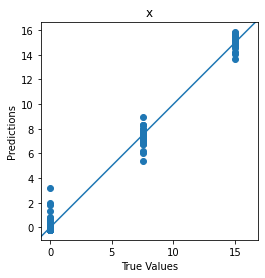

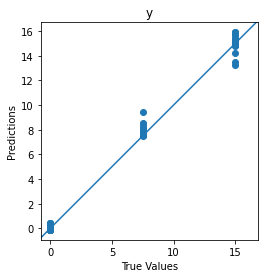

In [84]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='x')
plot_diff(test_Y[1], Y_pred[1], title='y')

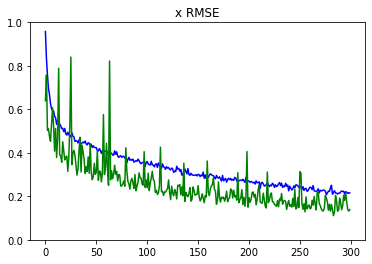

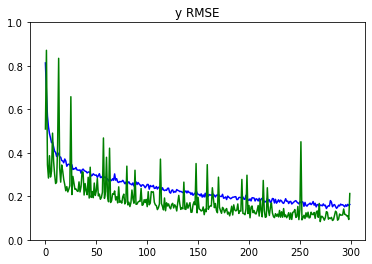

In [85]:
# Plot RMSE
plot_metrics(metric_name='x_output_root_mean_squared_error', title='x RMSE', ylim=1)
plot_metrics(metric_name='y_output_root_mean_squared_error', title='y RMSE', ylim=1)

In [86]:
# Save model
model.save('./xyForcePlate6/', save_format='tf')

INFO:tensorflow:Assets written to: ./xyForcePlate6/assets


In [87]:
# Restore model
loaded_model = tf.keras.models.load_model('./xyForcePlate6/')

In [43]:
dataVal.iloc[:,:4].shape

(40000, 4)

In [44]:
# Run predict with restored model
predictions = loaded_model.predict(dataVal.iloc[:,:4])
x_pred = predictions[0]
y_pred = predictions[1]

In [57]:
norm_test_X.shape

(50000, 4)

In [53]:
norm_test_X[0]

array([ 1.02478891, -0.37257721,  0.63687956,  0.94191688])

In [46]:
print(x_pred)

[[ -42.01431 ]
 [  29.233204]
 [-194.94339 ]
 ...
 [ -59.731293]
 [  11.876278]
 [ -15.666477]]


In [47]:
print(dataVal.iloc[:,:4])

         F0   F1   F2   F3
68708   380  249  330  524
99414   329  254  364  461
149362  268  300  304  567
221717  336  330  330  525
96658   317  249  359  455
...     ...  ...  ...  ...
80692   389  228  367  519
39978   286  292  301  486
155390  343  247  330  520
188289  392  372  357  533
219339  404  277  326  510

[40000 rows x 4 columns]


################################################################################